### Student Information
Name: Yu-Han Zhao 趙宇涵

Student ID: 110033635

GitHub ID: honey0703

Kaggle name: honey0703

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

## 1. Data Preparation
### 1.1 Load data
1. Read json files
2. Split to train and test df
3. Append emotions after traon df

In [1]:
# Read json data to pd
import numpy as np 
import pandas as pd
import json

# df = pd.read_json("dm2021-lab2-hw2/tweets_DM.json",lines=True, orient='columns')

In [2]:
# # Show df
# df.head()

In [3]:
# # select '_source' column as 'source'
# source = df._source

# # normalize 'source'
# twit = pd.json_normalize(source)

# # show twit
# twit.head()

In [4]:
# # rename column for merge later

# twit = twit.rename(columns={"tweet.hashtags": "hashtags", "tweet.tweet_id": "tweet_id", "tweet.text": "text"})
# twit.head()

In [5]:
# # to split train test
# # read file 'data_identification.csv'

# iden = pd.read_csv('dm2021-lab2-hw2/data_identification.csv')
# iden.head()

In [6]:
# # merge twit dataframe with data_identification.csv

# total = pd.merge(twit, iden, on="tweet_id", how="left")
# total.head()

In [7]:
# # categorize the data into two set, train and test.

# train = total[total["identification"] == "train"]
# test = total[total["identification"] == "test"]

In [8]:
# # drop hashtags column and identification column, since we will not use it

# train = train.drop(columns=['hashtags', 'identification'])
# test = test.drop(columns=['hashtags', 'identification'])

In [9]:
# train.head()

In [10]:
# test.head()

In [11]:
# # read the labels
# emo = pd.read_csv('dm2021-lab2-hw2/emotion.csv')
# emo.head()

In [12]:
# # merge train with emotions.csv

# train = pd.merge(train, emo, on="tweet_id", how="left")
# train.head()

In [13]:
# # see the shape of the data

# print("train shape :", train.shape)
# print("test shape :", test.shape)

### 1.2 Save data

In [14]:
# # save to pickle file

# train.to_pickle("train_df.pkl") 
# test.to_pickle("test_df.pkl")

In [15]:
# load a pickle file

train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")
train_df.shape

(1455563, 3)

### 1.3 Exploratory data analysis (EDA)

In [16]:
#group to find distribution

train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

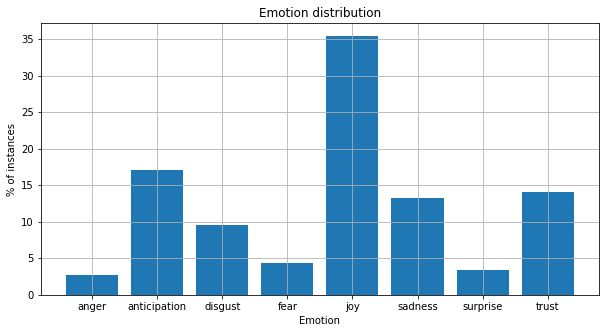

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature Engineering
### 2.0 Sample and train/val split 

In [18]:
train_df.shape

(1455563, 3)

In [19]:
# split data into training and testing set

from sklearn.model_selection import train_test_split

X = train_df['text']
y = train_df['emotion']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=1)

In [20]:
# see the shape of the data

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_val', X_val.shape)
print('y_val', y_val.shape)

X_train (1164450,)
y_train (1164450,)
X_val (291113,)
y_val (291113,)


### 2.1 Using Bag of Words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
def BOW():
    # build analyzers (bag-of-words)
    BOW_vectorizer = CountVectorizer() 
    
    # 1. Learn a vocabulary dictionary of all tokens in the raw documents.
    BOW_vectorizer.fit(X_train)

    # 2. Transform documents to document-term matrix.
    train_data_BOW_features = BOW_vectorizer.transform(X_train)
    val_data_BOW_features = BOW_vectorizer.transform(X_val)
    
    #  add .toarray() to show
    train_data_BOW_features.toarray()
    
    # check the dimension
    print ('shape: ', train_data_BOW_features.shape)
    
    # observe some feature names
    feature_names = BOW_vectorizer.get_feature_names()
    print (feature_names[100:110])
    print ("😂" in feature_names)
    return BOW_vectorizer

### 2.2 Use nltk tokenize

In [22]:
import nltk
def NLTK():
    # build analyzers (bag-of-words)
    BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

    # apply analyzer to training data
    BOW_500.fit(X_train)

    train_data_BOW_features_500 = BOW_500.transform(X_train)

    ## check dimension
    print ('shape:', train_data_BOW_features_500.shape)
    
    train_data_BOW_features_500.toarray()
    
    # observe some feature names
    feature_names_500 = BOW_500.get_feature_names()
    print (feature_names_500[:10])
    print ("😂" in feature_names)
    return BOW_500

### 2.3 TFIDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

def TFIDF():
    TFIDF_500 = TfidfVectorizer(max_features=5000, tokenizer=nltk.word_tokenize, stop_words='english')
    train_data_TFIDF_features_500 = TFIDF_500.fit_transform(X_train)
    print ('shape: ', train_data_TFIDF_features_500.shape)
    train_data_TFIDF_features_500.toarray()
    feature_names_500 = TFIDF_500.get_feature_names()
    print (feature_names_500[:10])
    print ("😂" in feature_names_500)
    return TFIDF_500

In [24]:
# Choose the type of features
featureType = TFIDF()

shape:  (1164450, 5000)
['!', '#', '$', '%', '&', "'", "''", "'d", "'em", "'ll"]
True


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Models

In [25]:
# Choose feature (BOW_500 / TFIDF_500)
# featureType = BOW_500 

# for a classificaiton problem, you need to provide both training & testing data
X_train = featureType.transform(X_train)
X_val = featureType.transform(X_val)

In [26]:
## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_val.shape: ', X_val.shape)
print('y_val.shape: ', y_val.shape)

X_train.shape:  (1164450, 5000)
y_train.shape:  (1164450,)
X_val.shape:  (291113, 5000)
y_val.shape:  (291113,)


### 3.1 Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
def DecisionTree():
    ## build DecisionTree model
    DT_model = DecisionTreeClassifier(random_state=0)

    ## training!
    DT_model = DT_model.fit(X_train, y_train)

    ## predict!
    y_train_pred = DT_model.predict(X_train)
    y_val_pred = DT_model.predict(X_val)

    ## so we get the pred result
    print (y_val_pred[:10])
    return y_train_pred, y_val_pred, DT_model

* with all training_split data, 500 TFIDF features.  
training accuracy: 0.89  
testing accuracy: 0.42  

### 3.2 Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
def NaiveBayes():
    NB_model = MultinomialNB()
    
    # training!
    NB_model = NB_model.fit(X_train, y_train)
    
    ## predict!
    y_train_pred = NB_model.predict(X_train)
    y_val_pred = NB_model.predict(X_val)

    ## so we get the pred result
    print (y_val_pred[:10])
    
    return y_train_pred, y_val_pred, NB_model

### 3.3 Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest():
    RF_model = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0, n_jobs= -1,
                                    max_depth=11, max_features='log2', verbose=1)
    
    # Training
    RF_model = RF_model.fit(X_train, y_train)
    
    # Tesing
    y_train_pred = RF_model.predict(X_train)
    y_val_pred = RF_model.predict(X_val)
    
    # so we get the pred result
    print (y_val_pred[:10])
    
    return y_train_pred, y_val_pred, RF_model

* with all training_split data, 500 TFIDF features:  
training accuracy: 0.39  
testing accuracy: 0.38  
tend to predict all to "joy"

### 3.4 Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
def Logistic():
    LR_model = LogisticRegression(C=1000, penalty="l2")
    
    # Training
    LR_model = LR_model.fit(X_train, y_train)
    
    # Testing
    y_train_pred = LR_model.predict(X_train)
    y_val_pred = LR_model.predict(X_val)
    
    # so we get the pred result
    print (y_val_pred[:10])
    
    return y_train_pred, y_val_pred, LR_model

* with all triaining_split data, 2000 TFIDF features:  
training accuracy: 0.51  
testing accuracy: 0.51
* with all training_split data, 5000 TFIDF features:  
training accuracy: 0.53  
testing accuracy: 0.52  

In [31]:
y_train_pred, y_val_pred, model = Logistic()

['trust' 'joy' 'joy' 'anticipation' 'joy' 'trust' 'anticipation' 'joy'
 'joy' 'joy']


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
    # save model
    import pickle
    f = open('Model/RLmodel_TF2000.pickle', 'wb')
    pickle.dump(model, f)
    f.close()

## Evaluation 

In [34]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_val, 2)))

training accuracy: 0.53
testing accuracy: 0.52


In [35]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_val, y_pred=y_val_pred))

              precision    recall  f1-score   support

       anger       0.58      0.19      0.29      8021
anticipation       0.56      0.51      0.53     50164
     disgust       0.46      0.34      0.39     27672
        fear       0.67      0.33      0.44     13007
         joy       0.52      0.80      0.63    102799
     sadness       0.50      0.44      0.47     38812
    surprise       0.55      0.19      0.28      9695
       trust       0.54      0.25      0.35     40943

    accuracy                           0.52    291113
   macro avg       0.55      0.38      0.42    291113
weighted avg       0.53      0.52      0.50    291113



In [36]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred) 
print(cm)

[[ 1519   679  1096    85  3062  1341    58   181]
 [  117 25518  1166   347 18621  2215   194  1986]
 [  315  1738  9395   308  9549  5469   280   618]
 [   72  1209   683  4258  5111  1242   124   308]
 [  228  8516  2065   639 82389  3930   348  4684]
 [  248  2546  3975   384 13401 17141   328   789]
 [   45   799   926   116  4397  1374  1809   229]
 [   71  4664   996   217 22658  1795   156 10386]]


In [37]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

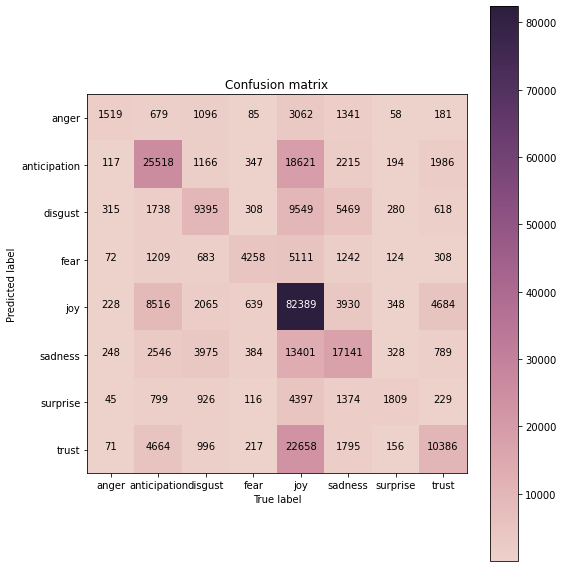

In [38]:
# plot your confusion matrix
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## Output Result

In [43]:
# Load data
X_test = test_df['text']

# Transform X
X_test = featureType.transform(X_test)
print('X_test.shape: ', X_test.shape)

# Predict
y_test_pred = model.predict(X_test)
print (y_test_pred[:10])

X_test.shape:  (411972, 5000)
['anticipation' 'anticipation' 'joy' 'joy' 'anticipation' 'joy' 'joy'
 'joy' 'joy' 'sadness']


In [ ]:
# Submission
submission = pd.DataFrame({'id':test['tweet_id'],'emotion':y_test_pred})
submission.head()

In [ ]:
# Check the shape
submission.shape

In [ ]:
path = 'Result/'
filename = 'LR_TFIDF5000.csv'
submission.to_csv(path+filename, index=False)
print('Saved file: ' + filename)